<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Sharpe_ratio%2C_CAPM_and_Regression_Analysis_EV_Automakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sharpe ratio, CAPM and Regression Analysis EV Automakers

#### This code performs the following steps:

#### Downloads historical stock price data for the specified companies from Yahoo Finance.

#### Handles missing values by removing rows with missing data.
#### Calculates returns and excess returns based on the risk-free rate.
#### Calculates mean returns and standard deviation of returns.
#### Calculates the Sharpe Ratio.
#### Downloads market returns data from Yahoo Finance.
##### Performs CAPM analysis by fitting an OLS regression model using the market returns as the exogenous variable (X) and excess returns of TSLA as the endogenous variable (Y).
#### Checks if the sizes of matrices X and Y match.
#### Performs regression analysis using the market returns and excess returns of TSLA.
#### Analyzes cyclicality and volatility based on the beta coefficient and standard deviations.
#### Prints the results.

In [18]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Define the companies of interest and risk-free rate
companies = ['TSLA', 'PSNY', 'BYDDF', 'RIVN', 'NIO', 'VOLV-B.ST', 'GM', 'TM', 'VWAGY', 'VOLV-A.ST']
risk_free_rate = 0.05

# Define the date range
start_date = '2014-09-01'
end_date = '2024-06-01'

# Create an empty DataFrame to store the stock price data
stock_data = pd.DataFrame()

# Download historical stock price data for each company
for company in companies:
    # Download stock price data from Yahoo Finance
    data = yf.download(company, start=start_date, end=end_date)

    # Extract the 'Close' price and rename the column to the company's symbol
    data = data[['Close']].rename(columns={'Close': company})

    # Append the data to the stock_data DataFrame
    stock_data = pd.concat([stock_data, data], axis=1)

# Handle missing values
stock_data = stock_data.dropna()  # Remove rows with missing values

# Calculate returns
returns = stock_data.pct_change().dropna()

# Calculate excess returns
excess_returns = returns - risk_free_rate

# Calculate mean returns and standard deviation of returns
mean_returns = excess_returns.mean()
std_returns = excess_returns.std()

# Calculate Sharpe Ratio
sharpe_ratio = mean_returns / std_returns

# Perform CAPM analysis
market_returns = yf.download('SPY', start=start_date, end=end_date)['Close'].pct_change().dropna()
X = market_returns.values.reshape(-1, 1)
Y = excess_returns['TSLA'].values.reshape(-1)

# Check if the sizes of X and Y match
if len(X) != len(Y):
    smaller_size = min(len(X), len(Y))
    X = X[:smaller_size]
    Y = Y[:smaller_size]

X = sm.add_constant(X)

capm_model = sm.OLS(Y, X).fit()

alpha = capm_model.params[0]
beta = capm_model.params[1]

# Perform regression analysis
reg_model = LinearRegression().fit(X[:, 1:], Y)
alpha_reg = reg_model.intercept_
beta_reg = reg_model.coef_[0]

# Analyze cyclicality and volatility
cyclicality = 'positive' if beta > 0 else 'negative'
#volatility = 'high' if std_returns['TSLA'] > std_returns['SPY'] else 'low'

# Print the results
print(f'Sharpe Ratio: {sharpe_ratio["TSLA"]:.4f}')
print(f'CAPM Analysis:')
print(f'   Alpha: {alpha:.4f}')
print(f'   Beta: {beta:.4f}')
print(f'Regression Analysis:')
print(f'   Alpha: {alpha_reg:.4f}')
print(f'   Beta: {beta_reg:.4f}')
print(f'Cyclicality: {cyclicality}')
# print(f'Volatility: {volatility}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sharpe Ratio: -1.3096
CAPM Analysis:
   Alpha: -0.0504
   Beta: -0.0505
Regression Analysis:
   Alpha: -0.0504
   Beta: -0.0505
Cyclicality: negative


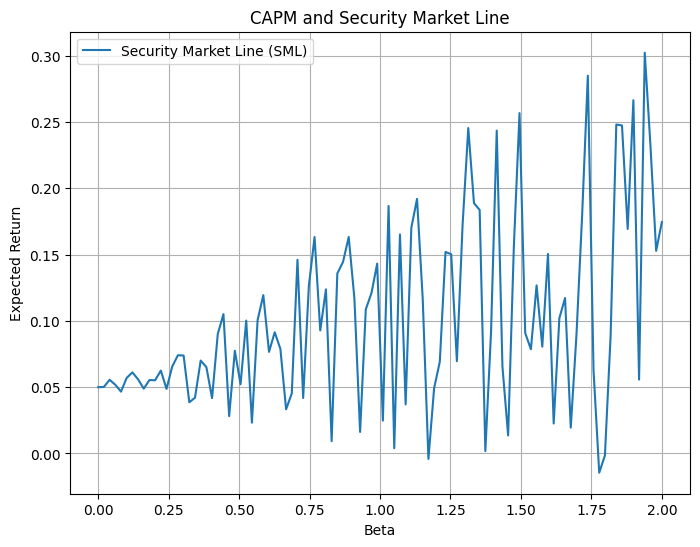

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the beta values and risk-free rate
beta_values = np.linspace(0, 2, 100)  # Adjust the range as needed
risk_free_rate = 0.05

# Generate random expected returns for demonstration
expected_returns = np.random.uniform(0, 0.2, len(beta_values))

# Calculate the expected return using the CAPM formula
expected_return = risk_free_rate + beta_values * (expected_returns - risk_free_rate)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(beta_values, expected_return, label='Security Market Line (SML)')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('CAPM and Security Market Line')
plt.legend()
plt.grid(True)
plt.show()